In [2]:
import pandas as pd
import numpy as np

file1=pd.read_csv('LPOINT_BIG_COMP_01_DEMO.csv')
file2=pd.read_csv('LPOINT_BIG_COMP_02_PDDE.csv')
file3=pd.read_csv('LPOINT_BIG_COMP_03_COP_U.csv')
file4=pd.read_csv('LPOINT_BIG_COMP_04_PD_CLAC.csv')
file5=pd.read_csv('LPOINT_BIG_COMP_05_BR.csv')
file6=pd.read_csv('LPOINT_BIG_COMP_06_LPAY.csv')

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#엘페이 이용자들의 제휴사파악하기
file6.cop_c.unique()
file6['lpoint']=1

In [25]:
file2

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1
...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1


In [113]:
l_del=file6['cop_c']!='L01'
file6=file6[l_del]
l_del=file6['cop_c']!='L00'
file6=file6[l_del]

In [114]:
file6.cop_c.unique()

array(['A03', 'A02', 'A06', 'A01', 'C01', 'D02', 'A04', 'D01', 'A05',
       'C02', 'E01', 'B01'], dtype=object)

In [115]:
#2,3번데이터들에 있어서 6번데이터의 제휴사와 같은것들만 추출
file23=pd.concat([file2,file3])
file23_cop=file23[file23['cop_c'].isin(['A03', 'A02', 'A06', 'A01', 'C01', 'D02', 'A04',
       'D01', 'A05', 'C02', 'E01', 'B01'])]
file23=file23_cop.drop(['br_c','pd_c','buy_ct','vst_dt'],axis=1)


In [116]:
#6번데이터는 수량이 없고 총금액만 있으므로 2,3번데이터들도 총금액을 만들어줌
a=file23.groupby(by=['rct_no','cust','chnl_dv','de_hr','de_dt','cop_c']).sum()
a.reset_index()

,rct_no,cust,chnl_dv,de_hr,de_dt,cop_c,buy_am
0,20122713C012328716,M495972460,2,13,20201227,C01,26000.0
1,20122900C013317930,M192531170,2,0,20201229,C01,10000.0
2,20122911C011862577,M039320884,2,11,20201229,C01,6500.0
3,20123009C012921880,M201983289,2,9,20201230,C01,24000.0
4,20123012C011060420,M205977381,2,12,20201230,C01,6500.0
...,...,...,...,...,...,...,...
1514888,E06052115831,M816318679,2,22,20211231,A06,50000.0
1514889,E06052116037,M816318679,2,22,20211231,A06,30000.0
1514890,E06052117103,M182645944,2,23,20211231,A06,289000.0
1514891,E06052118403,M533286446,2,23,20211231,A06,1000000.0


In [117]:
aa=a.reset_index()
aa['lpoint']=0

In [118]:
#23번데이터들에있어서 6번데이터만큼 추출함
#aaa=aa.sample(n=353184)


In [119]:
#엘페이 이용자들이 각각 반반씩 있는걸로 만듬
lpay_=pd.concat([aa,file6])
lpay_

,rct_no,cust,chnl_dv,de_hr,de_dt,cop_c,buy_am,lpoint
0,20122713C012328716,M495972460,2,13,20201227,C01,26000.0,0
1,20122900C013317930,M192531170,2,0,20201229,C01,10000.0,0
2,20122911C011862577,M039320884,2,11,20201229,C01,6500.0,0
3,20123009C012921880,M201983289,2,9,20201230,C01,24000.0,0
4,20123012C011060420,M205977381,2,12,20201230,C01,6500.0,0
...,...,...,...,...,...,...,...,...
353179,210125110644545,M470112503,2,11,20210125,A06,51800.0,1
353180,210104210652271,M470112503,2,21,20210104,A06,6440.0,1
353181,210119200278240,M748878049,1,20,20210119,A02,17600.0,1
353182,210119180267206,M748878049,1,18,20210119,A02,12400.0,1


In [120]:
#날짜형식으로 바꿔 월 추출
lpay_['de_dt']=lpay_['de_dt'].astype(str)
lpay_['de_dt'] = pd.to_datetime(lpay_['de_dt'])
lpay_['month'] =lpay_['de_dt'].dt.month

In [121]:
#나이대, 성별 라벨링해주기
lpay1=lpay_.merge(file1,on='cust',how='left')
_ages=[
    (lpay1['ages']=='20대')
    ,(lpay1['ages']=='30대')
    ,(lpay1['ages']=='40대')
    ,(lpay1['ages']=='50대')
    ,(lpay1['ages']=='60대')
    ,(lpay1['ages']=='70대')
]
choicelist=[2,3,4,5,6,7]
lpay1['ages'] = np.select(_ages, choicelist, default="xx")
_gender=[
    (lpay1['ma_fem_dv']=="남성"),
    (lpay1['ma_fem_dv']=='여성')
]
_choicelist=[1,2]
lpay1['ma_fem_dv'] = np.select(_gender, _choicelist, default="xx")

In [122]:
lpay1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1774612 entries, 0 to 1774611
Data columns (total 12 columns):
 #   Column     Dtype         
---  ------     -----         
 0   rct_no     object        
 1   cust       object        
 2   chnl_dv    int64         
 3   de_hr      int64         
 4   de_dt      datetime64[ns]
 5   cop_c      object        
 6   buy_am     float64       
 7   lpoint     int64         
 8   month      int64         
 9   ma_fem_dv  object        
 10  ages       object        
 11  zon_hlv    object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 176.0+ MB


In [123]:
#TYPE맞춰주기
lpay1[[ 'ma_fem_dv','ages']] =lpay1[['ma_fem_dv','ages']].apply(pd.to_numeric)


In [124]:
#지역분류
_zon=[
    (lpay1['zon_hlv']=='Z17')
    ,(lpay1['zon_hlv']=='Z04')
    ,(lpay1['zon_hlv']=='Z10')
    ,(lpay1['zon_hlv']=='Z09')
    ,(lpay1['zon_hlv']=='Z16')
    ,(lpay1['zon_hlv']=='Z07')
    ,(lpay1['zon_hlv']=='Z01')
    ,(lpay1['zon_hlv']=='Z05')
    ,(lpay1['zon_hlv']=='Z14')
    ,(lpay1['zon_hlv']=='Z13')
    ,(lpay1['zon_hlv']=='Z11')
    ,(lpay1['zon_hlv']=='Z08')
    ,(lpay1['zon_hlv']=='Z03')
    ,(lpay1['zon_hlv']=='Z06')
    ,(lpay1['zon_hlv']=='Z15')
    ,(lpay1['zon_hlv']=='Z02')
    ,(lpay1['zon_hlv']=='Z12')
]
list_1=[17,4,10,9,16,7,1,5,14,13,11,8,3,6,15,2,12]
lpay1['zon_hlv'] = np.select(_zon, list_1, default="xx")

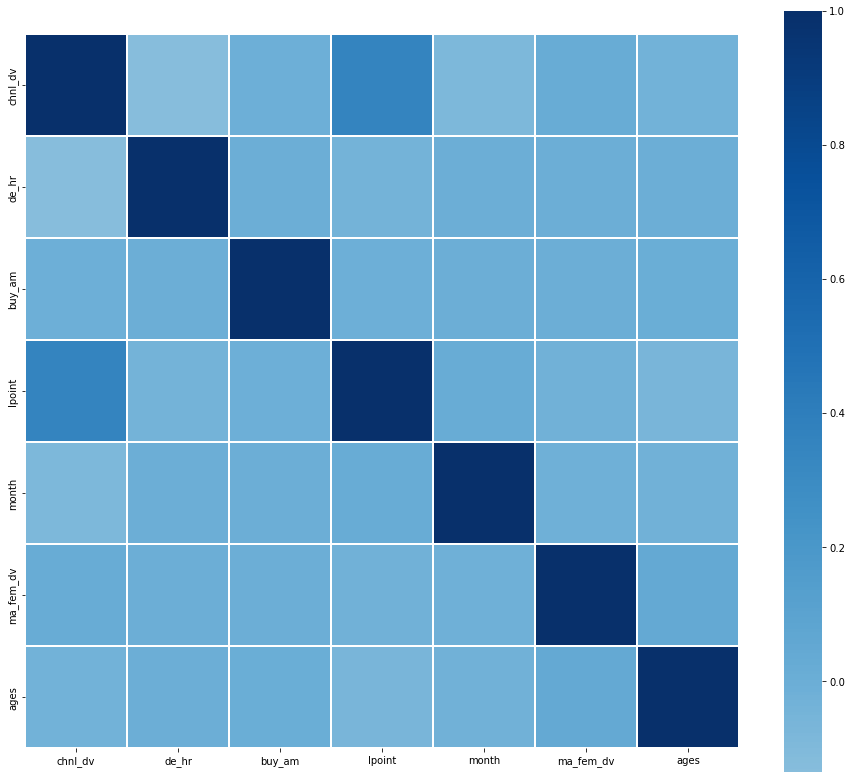

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = lpay1.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(corr, vmax=1, center=0,
            square=True, linewidths=2, cmap='Blues')
plt.show()

In [137]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
chnl_dv,1774612.0,1.139149,0.346102,1.0,1.0,1.0,1.0,2.0
de_hr,1774612.0,15.246537,3.900055,0.0,13.0,15.0,18.0,23.0
buy_am,1774612.0,68827.988891,415615.047612,1.0,7200.0,17200.0,46430.0,70092000.0
lpoint,1774612.0,0.146353,0.353459,0.0,0.0,0.0,0.0,1.0
month,1774612.0,6.495960,3.384286,1.0,4.0,6.0,9.0,12.0
ma_fem_dv,1774612.0,1.697675,0.459266,1.0,1.0,2.0,2.0,2.0
ages,1774612.0,3.919516,1.070224,2.0,3.0,4.0,5.0,7.0
cop_c_A01,1774612.0,0.315912,0.464878,0.0,0.0,0.0,1.0,1.0
cop_c_A02,1774612.0,0.232341,0.422325,0.0,0.0,0.0,0.0,1.0
cop_c_A03,1774612.0,0.117782,0.322350,0.0,0.0,0.0,0.0,1.0


In [138]:
lpay1.describe().T
final=lpay1
t=final['buy_am']<50000
final1=final[t]

In [162]:
_cop=[
    (lpay1['cop_c']=='C01'),
    (lpay1['cop_c']=='E01'),
    (lpay1['cop_c']=='D01'),
    (lpay1['cop_c']=='D02'),
    (lpay1['cop_c']=='B01'),
    (lpay1['cop_c']=='C02'),
    (lpay1['cop_c']=='A01'),
    (lpay1['cop_c']=='A02'),
    (lpay1['cop_c']=='A03'),
    (lpay1['cop_c']=='A04'),
    (lpay1['cop_c']=='A05'),
    (lpay1['cop_c']=='A06')
]
list_2=[1,2,3,4,5,6,7,8,9,10,11,12]
lpay1['cop_c'] = np.select(_cop, list_2, default="xx")

In [149]:
final=pd.get_dummies(final,columns = ['cop_c'])
final

,rct_no,cust,chnl_dv,de_hr,de_dt,buy_am,lpoint,month,ma_fem_dv,ages,...,cop_c_A03,cop_c_A04,cop_c_A05,cop_c_A06,cop_c_B01,cop_c_C01,cop_c_C02,cop_c_D01,cop_c_D02,cop_c_E01
0,20122713C012328716,M495972460,2,13,2020-12-27,26000.0,0,12,1,4,...,0,0,0,0,0,1,0,0,0,0
1,20122900C013317930,M192531170,2,0,2020-12-29,10000.0,0,12,2,4,...,0,0,0,0,0,1,0,0,0,0
2,20122911C011862577,M039320884,2,11,2020-12-29,6500.0,0,12,2,4,...,0,0,0,0,0,1,0,0,0,0
3,20123009C012921880,M201983289,2,9,2020-12-30,24000.0,0,12,1,4,...,0,0,0,0,0,1,0,0,0,0
4,20123012C011060420,M205977381,2,12,2020-12-30,6500.0,0,12,1,5,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774607,210125110644545,M470112503,2,11,2021-01-25,51800.0,1,1,2,5,...,0,0,0,1,0,0,0,0,0,0
1774608,210104210652271,M470112503,2,21,2021-01-04,6440.0,1,1,2,5,...,0,0,0,1,0,0,0,0,0,0
1774609,210119200278240,M748878049,1,20,2021-01-19,17600.0,1,1,2,3,...,0,0,0,0,0,0,0,0,0,0
1774610,210119180267206,M748878049,1,18,2021-01-19,12400.0,1,1,2,3,...,0,0,0,0,0,0,0,0,0,0


In [150]:
lpay1.cop_c.unique()

array(['C01', 'E01', 'D01', 'D02', 'B01', 'C02', 'A01', 'A02', 'A03',
       'A04', 'A05', 'A06'], dtype=object)

In [163]:
lpay1

,rct_no,cust,chnl_dv,de_hr,de_dt,cop_c,buy_am,lpoint,month,ma_fem_dv,ages,zon_hlv
0,20122713C012328716,M495972460,2,13,2020-12-27,1,26000.0,0,12,1,4,1
1,20122900C013317930,M192531170,2,0,2020-12-29,1,10000.0,0,12,2,4,1
2,20122911C011862577,M039320884,2,11,2020-12-29,1,6500.0,0,12,2,4,1
3,20123009C012921880,M201983289,2,9,2020-12-30,1,24000.0,0,12,1,4,1
4,20123012C011060420,M205977381,2,12,2020-12-30,1,6500.0,0,12,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1774607,210125110644545,M470112503,2,11,2021-01-25,12,51800.0,1,1,2,5,12
1774608,210104210652271,M470112503,2,21,2021-01-04,12,6440.0,1,1,2,5,12
1774609,210119200278240,M748878049,1,20,2021-01-19,8,17600.0,1,1,2,3,8
1774610,210119180267206,M748878049,1,18,2021-01-19,8,12400.0,1,1,2,3,8


In [187]:
from sklearn.linear_model import LogisticRegression
#'cop_c_C01', 'cop_c_E01', 'cop_c_D01', 'cop_c_D02',          'cop_c_B01', 'cop_c_C02', 'cop_c_A01', 'cop_c_A02', 'cop_c_A03',       'cop_c_A04', 'cop_c_A05', 'cop_c_A06'
X=lpay1[['chnl_dv','ages','ma_fem_dv','month','buy_am','zon_hlv','cop_c']]
y=lpay1[['lpoint']]

In [188]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(X,y)

In [189]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

In [190]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_features, train_labels)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [192]:
y_pred = model.predict(test_features)

In [191]:
print(model.score(test_features, test_labels))

0.8749563284819443


In [177]:
print(model.score(train_features, train_labels))

0.8749112482052415


In [178]:
print(model.coef_)

[[ 0.66196566 -0.1918545  -0.08376219  0.20963273 -0.04016183  0.19609557
   0.19609557]]


In [193]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_labels,y_pred)

0.1250436715180558